<a href="https://colab.research.google.com/github/A-Hoshor/MLA_ADH/blob/main/MLA4_ADH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Imports for specific models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
from sklearn import tree
from sklearn.tree import export_text

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [5]:
from sklearn import set_config
set_config(display='diagram')

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
def plot_cm(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)
  fig = plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

In [9]:
def abline(slope,intercept,color):
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--', c=color)

###2. SVC Classification - Acquire Data

In [10]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

###3. Statistics and Visual Explorationj
####Please refer to MLA3_ADH for statistics and visual exploration

###4. Split Data in to Train/Test

In [13]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]

In [14]:
y = df[['forgery']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.20, random_state=0)

###5. Build the Pipeline

In [16]:
scaler = MinMaxScaler()

In [17]:
num_attribs = ['entropy', 'curtosis', 'skewness', 'variance']

In [18]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)
])

In [20]:
pipeline=Pipeline([
    ('trans', col_transform),
    ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
])

###6. Execute the Model

In [21]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['entropy', 'curtosis',
                                                   'skewness', 'variance'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

###7.Evaluate the Model

In [22]:
y_pred = pipeline.predict(X_test)

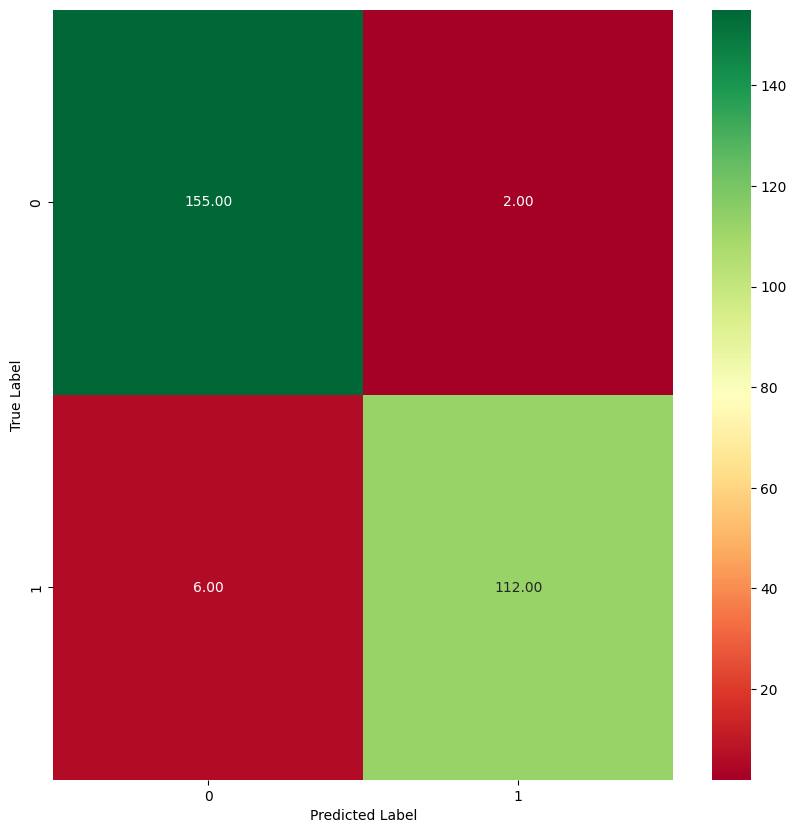

In [26]:
plot_cm(y_test,y_pred)

In [27]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision:  0.9824561403508771
Recall: 0.9491525423728814
F1 Score: 0.9655172413793103


[Text(0.5, 0.9166666666666666, 'x[14] <= 0.214\nsamples = 28032\nvalue = 27.369'),
 Text(0.25, 0.75, 'x[14] <= 0.071\nsamples = 17997\nvalue = 5.314'),
 Text(0.125, 0.5833333333333334, 'x[12] <= 0.253\nsamples = 16808\nvalue = 3.857'),
 Text(0.0625, 0.4166666666666667, 'x[9] <= 0.5\nsamples = 16790\nvalue = 3.752'),
 Text(0.03125, 0.25, 'x[17] <= 0.437\nsamples = 3714\nvalue = 4.771'),
 Text(0.015625, 0.08333333333333333, 'samples = 17\nvalue = 20.665'),
 Text(0.046875, 0.08333333333333333, 'samples = 3697\nvalue = 4.698'),
 Text(0.09375, 0.25, 'x[12] <= 0.134\nsamples = 13076\nvalue = 3.463'),
 Text(0.078125, 0.08333333333333333, 'samples = 13073\nvalue = 3.456'),
 Text(0.109375, 0.08333333333333333, 'samples = 3\nvalue = 31.647'),
 Text(0.1875, 0.4166666666666667, 'x[12] <= 0.391\nsamples = 18\nvalue = 101.45'),
 Text(0.15625, 0.25, 'x[9] <= 0.5\nsamples = 6\nvalue = 73.717'),
 Text(0.140625, 0.08333333333333333, 'samples = 5\nvalue = 79.222'),
 Text(0.171875, 0.08333333333333333, 's

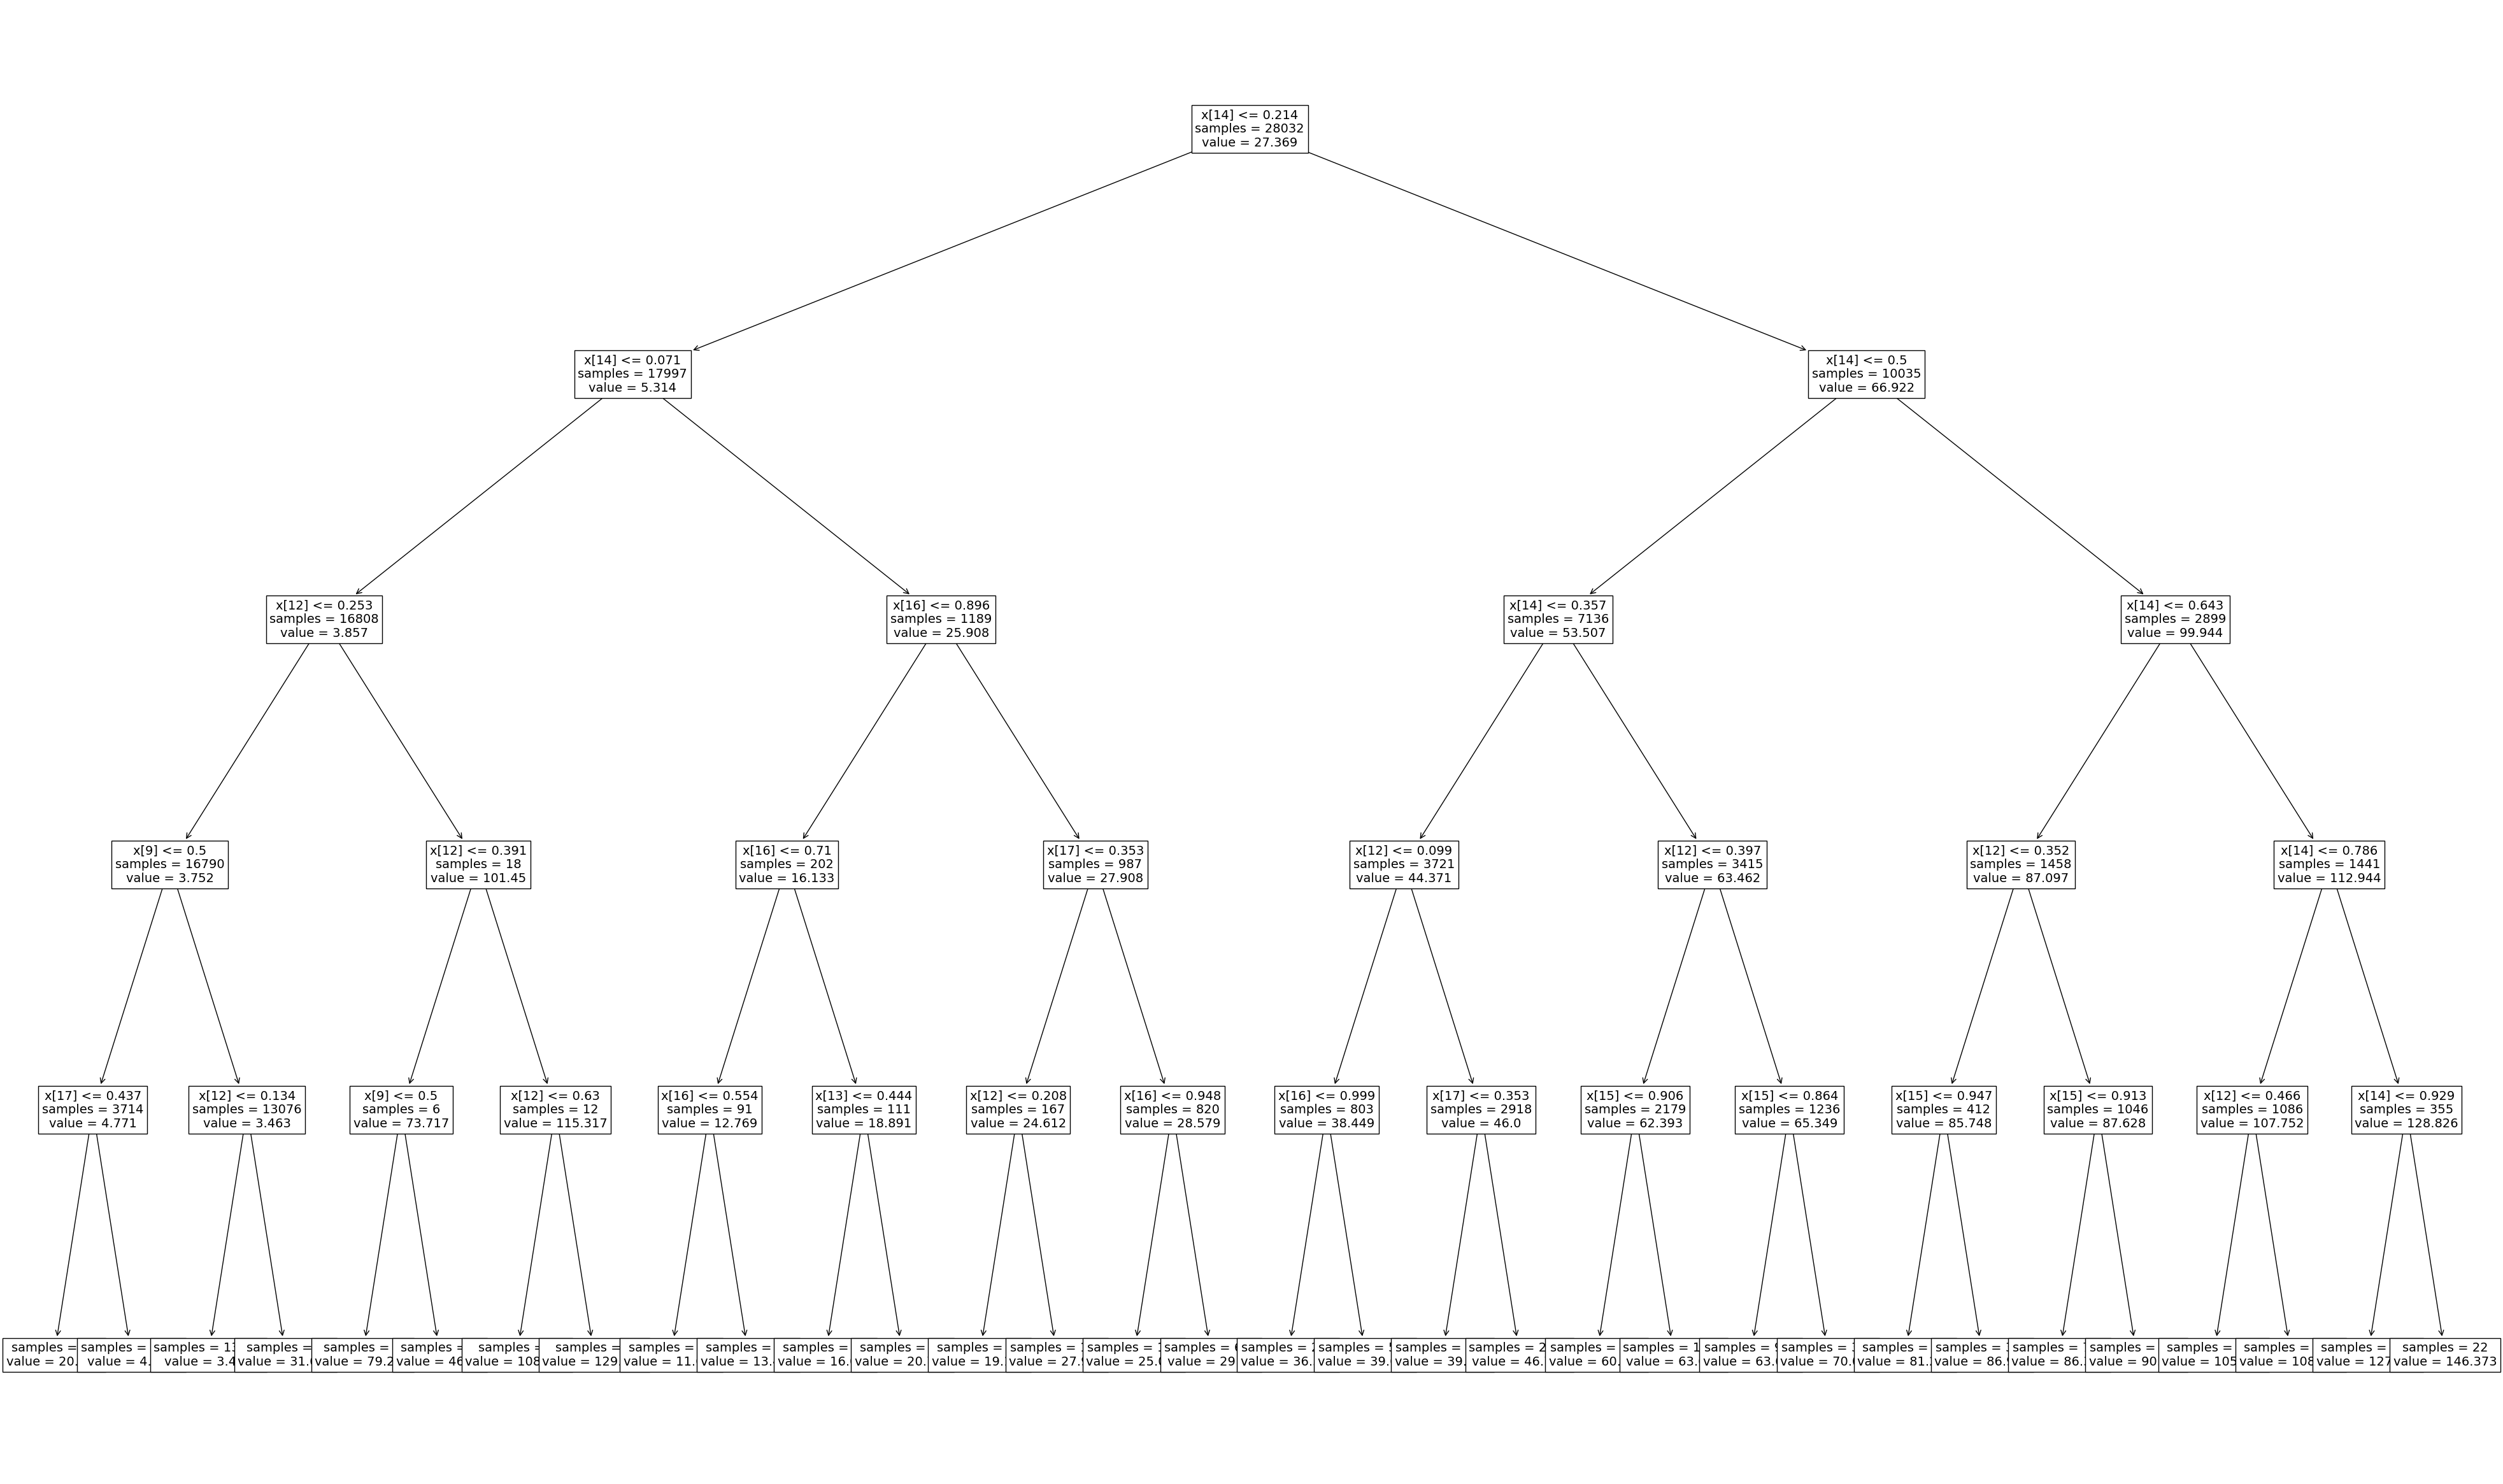

In [49]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(pipeline.named_steps.decision_tree, fontsize=14,impurity=False)

###8. Conclusion

####This data is pretty good. Our scores are close to perfect, with our precsion at 0.98 and recall at 0.94.

###1. Acquire Data

In [28]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [29]:
df.rename(columns={"Usage_kWh":"usage_kwh" , "Lagging_Current_Reactive.Power_kVarh":"lag_react_pwr_kvarh","Lagging_Current_Power_Factor":"lag_current_pwr", "Leading_Current_Power_Factor":"lead_current_pwr", "NSM":"nsm", "WeekStatus":"week_status", "Day_of_week":"day_of_week", "Load_Type":"load_type", "Leading_Current_Reactive_Power_kVarh":"lead_react_pwr_kvarh"},inplace=True)

###Split Data into Train/Test

In [30]:
X= df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']]

In [31]:
y=df[['usage_kwh']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

###3/4. Build the Pipeline

In [33]:
scaler=MinMaxScaler()

In [34]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [35]:
col_transform = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), cat_attribs),
    ('num', MinMaxScaler(), num_attribs)
])

In [36]:
import math
entropy = -1*((0.4*math.log2(0.4))+(0.6*math.log2(0.6)))
print("Entropy of the whole system is: ", entropy)

Entropy of the whole system is:  0.9709505944546686


In [46]:
pipeline = Pipeline([
    ('trans', col_transform),
    ('decision_tree', tree.DecisionTreeRegressor(max_depth=5))
])

###5. Execute the Model

In [47]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

###6. Evaluate the Model

In [65]:
y_pred = pipeline.predict(X_test)

In [66]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

3.507395088483466
3.754149258534359


[Text(0.5, 0.9166666666666666, 'x[14] <= 0.214\nsamples = 28032\nvalue = 27.369'),
 Text(0.25, 0.75, 'x[14] <= 0.071\nsamples = 17997\nvalue = 5.314'),
 Text(0.125, 0.5833333333333334, 'x[12] <= 0.253\nsamples = 16808\nvalue = 3.857'),
 Text(0.0625, 0.4166666666666667, 'x[9] <= 0.5\nsamples = 16790\nvalue = 3.752'),
 Text(0.03125, 0.25, 'x[17] <= 0.437\nsamples = 3714\nvalue = 4.771'),
 Text(0.015625, 0.08333333333333333, 'samples = 17\nvalue = 20.665'),
 Text(0.046875, 0.08333333333333333, 'samples = 3697\nvalue = 4.698'),
 Text(0.09375, 0.25, 'x[12] <= 0.134\nsamples = 13076\nvalue = 3.463'),
 Text(0.078125, 0.08333333333333333, 'samples = 13073\nvalue = 3.456'),
 Text(0.109375, 0.08333333333333333, 'samples = 3\nvalue = 31.647'),
 Text(0.1875, 0.4166666666666667, 'x[12] <= 0.391\nsamples = 18\nvalue = 101.45'),
 Text(0.15625, 0.25, 'x[9] <= 0.5\nsamples = 6\nvalue = 73.717'),
 Text(0.140625, 0.08333333333333333, 'samples = 5\nvalue = 79.222'),
 Text(0.171875, 0.08333333333333333, 's

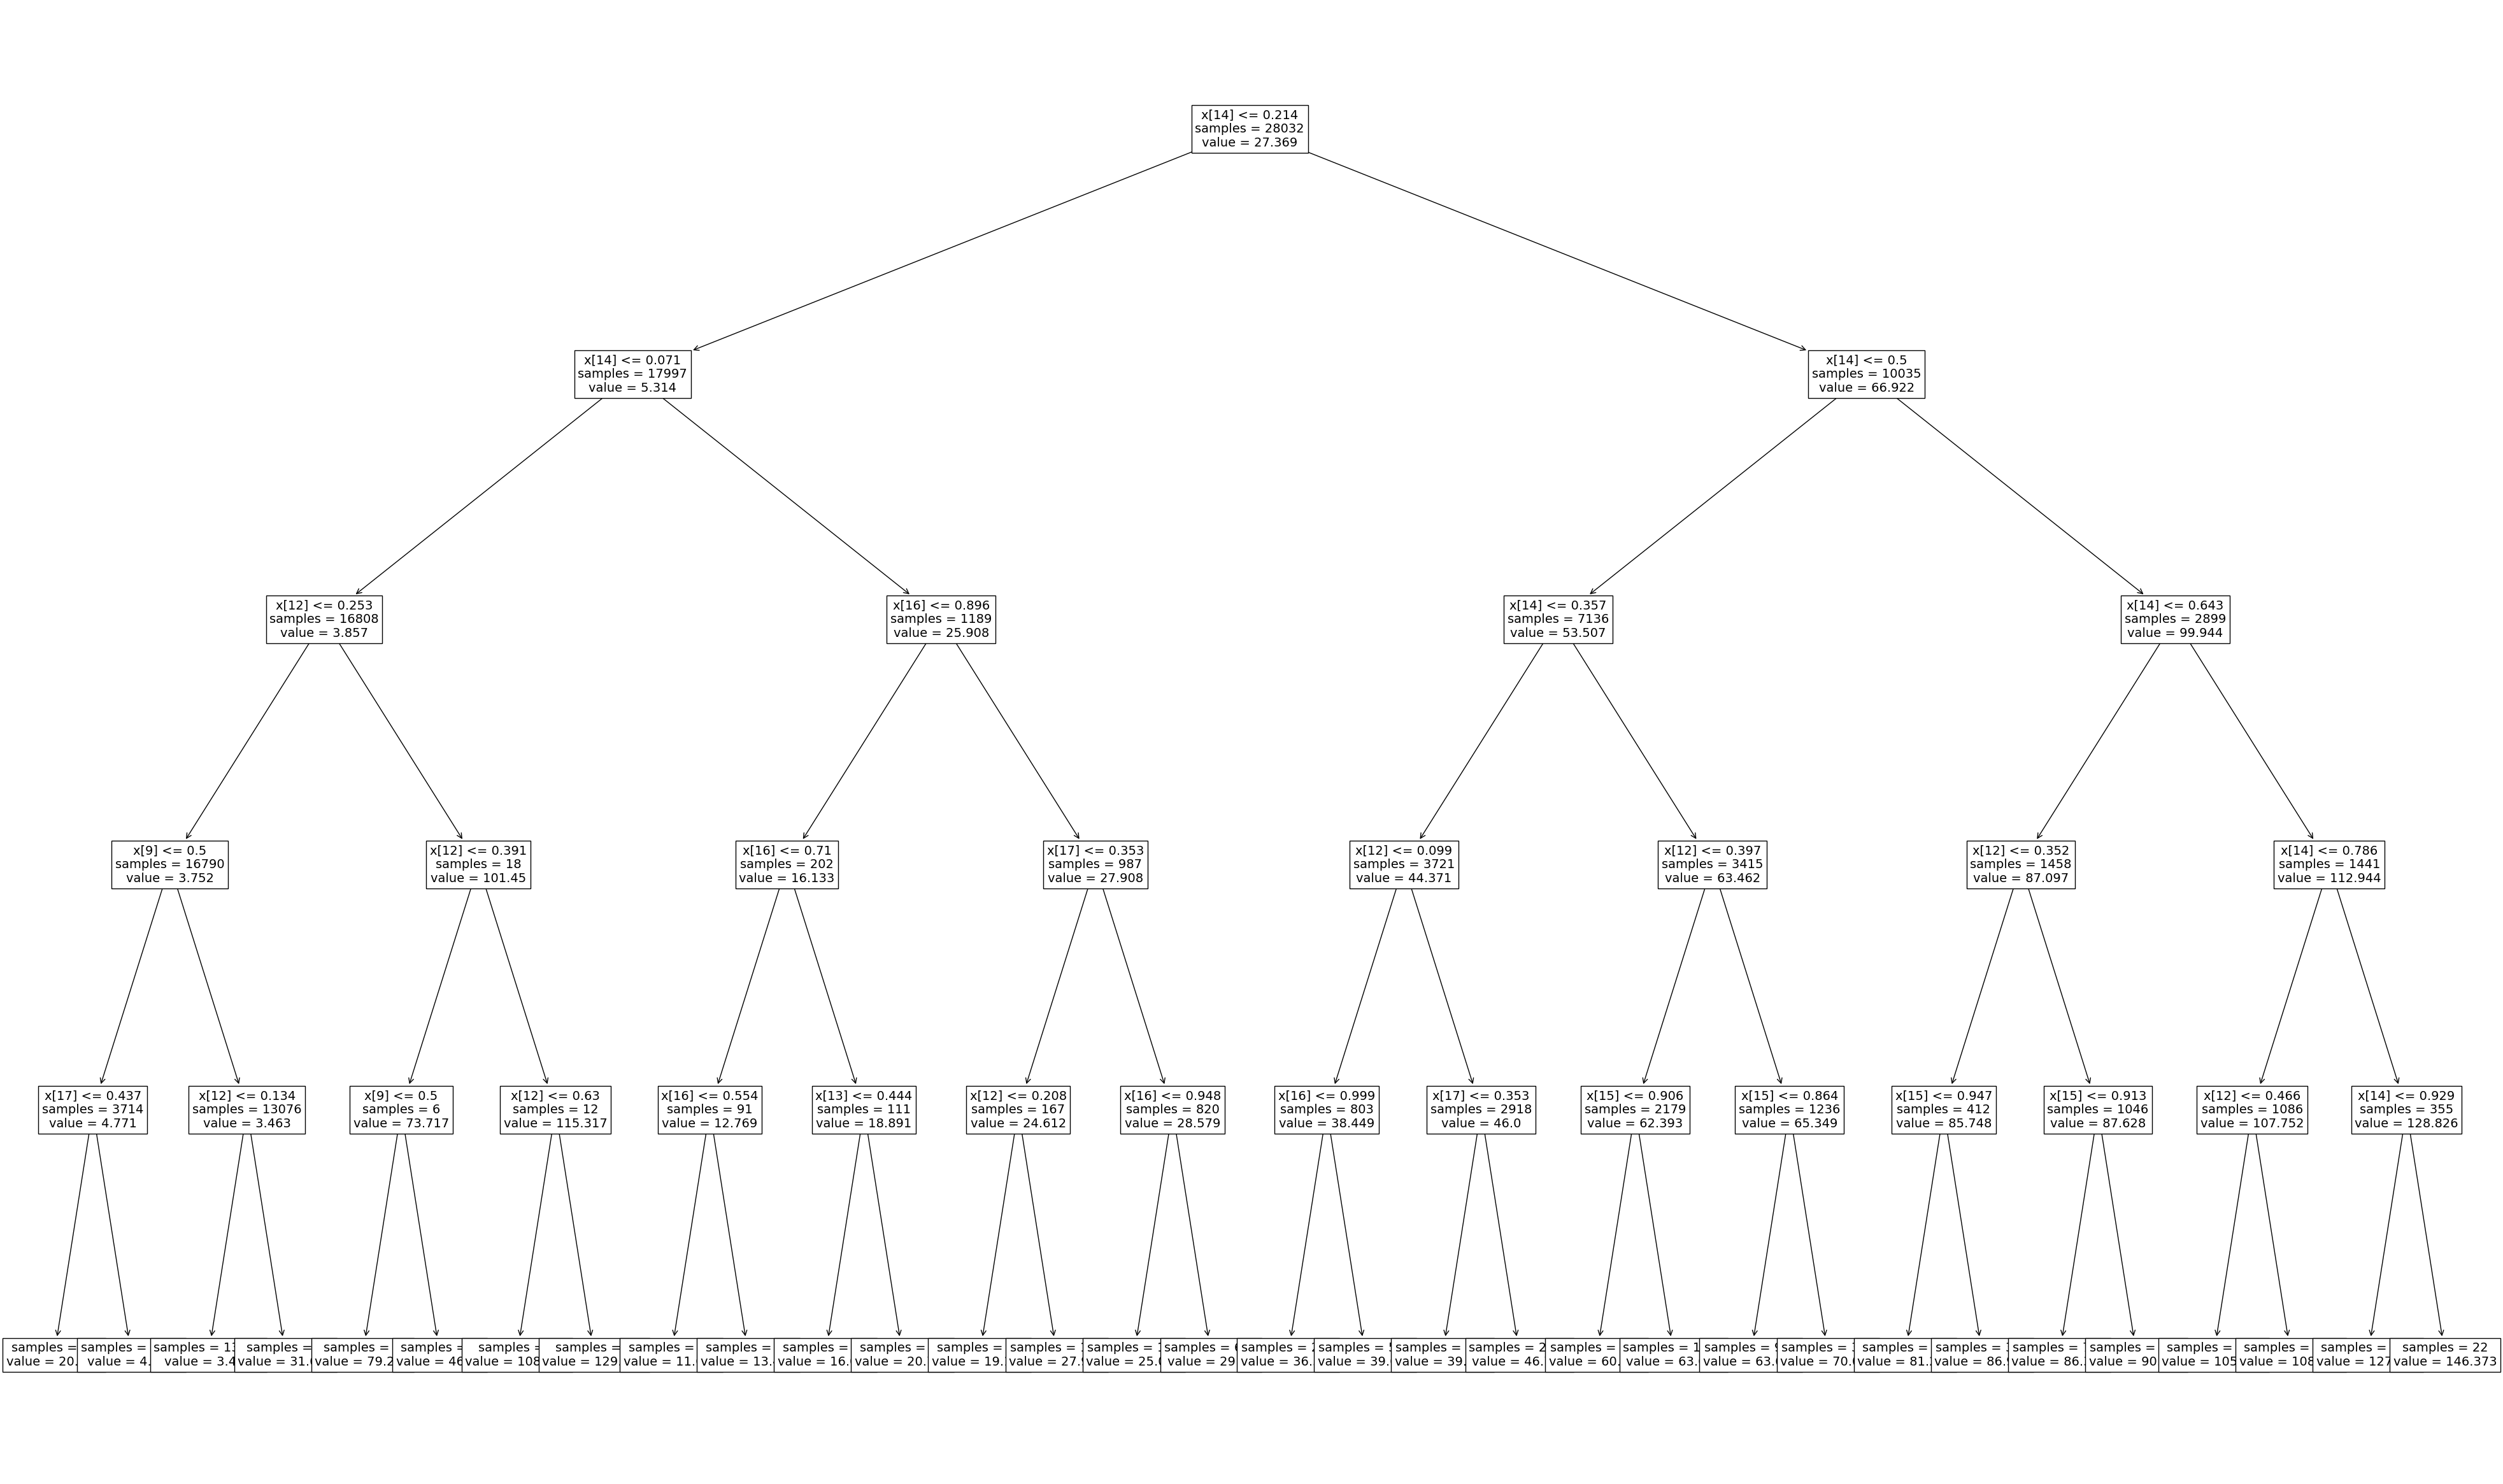

In [67]:
fig = plt.figure(figsize=(50,30))
tree.plot_tree(pipeline.named_steps.decision_tree, fontsize=14,impurity=False)

###7. Conclusion

#####Based on root mean squared errors this model is consistent - the two values for our training and testing data is close.

#####Our value for our RMSE is low, which indicates this is a good model.